<a href="https://colab.research.google.com/github/con11235/covid19_visualize/blob/master/fpopl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:

import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import datetime
import plotly.express as px

import plotly
from plotly.graph_objs import Scatter, Line, Layout
 
import importlib
import json
 
from plotly.subplots import make_subplots
import plotly.graph_objects as go


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


지역코드 확인용

=>exp : 동을 군, 구로 다 합쳐서 나타냄(앞에 4자리)

In [3]:
adstrd=pd.read_csv('/content/gdrive/My Drive/dacon/adstrd_master.csv')
adstrd['adstrd_code']=adstrd['adstrd_code'].astype(str)
adstrd['exp']=adstrd['adstrd_code'].apply(lambda x:x[:5])
adstrd['total_adstrd']=adstrd['brtc_nm']+' '+adstrd['signgu_nm']

adstrd_name=adstrd[['exp','total_adstrd']]
adstrd_name=adstrd_name.drop_duplicates(['exp'],keep='first')
adstrd_name=adstrd_name.reset_index()
adstrd_name=adstrd_name.drop(['index'],axis=1)

## 유동인구 데이터

In [5]:
fpopl=pd.read_csv('/content/gdrive/My Drive/dacon/fpopl.csv')

adstrd_code 앞에 5자리가 구까지 의미함.

ads_code=>지역구 의미

In [5]:
fpopl['adstrd_code']=fpopl['adstrd_code'].astype(str)
fpopl['ads_code'] = fpopl['adstrd_code'].apply(lambda x:x[:5])

일단 날짜 별, 위치별, 유동인구 수

In [ ]:
fpopl_by_day_cnt=fpopl[['base_ymd','ads_code','popltn_cascnt']]
fpopl_by_day_cnt=fpopl_by_day_cnt.groupby(['base_ymd','ads_code']).popltn_cascnt.sum().reset_index()

날짜가 int라서 datetime으로 변경

In [ ]:
fpopl_by_day_cnt['base_ymd']=fpopl_by_day_cnt['base_ymd'].astype(str)
for i in range(len(fpopl_by_day_cnt)):
  fpopl_by_day_cnt['base_ymd'][i]=datetime.datetime.strptime(fpopl_by_day_cnt['base_ymd'][i],"%Y%m%d").date()
fpopl_by_day_cnt.head()

,base_ymd,ads_code,popltn_cascnt
0,2020-01-01,11110,1289867
1,2020-01-01,11140,1250912
2,2020-01-01,11170,2122425
3,2020-01-01,11200,1892216
4,2020-01-01,11215,1832597


1)일단 날짜별로 유동인구 평균(전국)

In [ ]:
fpopl_by_day=fpopl_by_day_cnt.groupby(['base_ymd']).popltn_cascnt.mean()
fpopl_by_day=fpopl_by_day.reset_index()
fpopl_by_day=fpopl_by_day[19:] #확진자 데이터랑 유동인구 길이 맞춤.
fpopl_by_day=fpopl_by_day.reset_index()
fpopl_by_day=fpopl_by_day.drop(['index'],axis=1)

확진자 수 추이

In [ ]:
confirmed=pd.read_csv('/content/gdrive/My Drive/dacon/COVID_19/Time.csv')
confirmed.head()
confirmed=confirmed[['date','confirmed']]
confirmed.head()
confirmed['date']=pd.to_datetime(confirmed['date'])
confirmed=confirmed.sort_values(by=['confirmed'],ascending=False)
confirmed=confirmed.reset_index()
confirmed=confirmed.drop(['index'],axis=1)
c_d=[]
for i in range(len(confirmed)-1):
  c_d.append(confirmed['confirmed'][i]-confirmed['confirmed'][i+1])
c_d.append(1)

confirmed['daily_confirmed']=c_d
confirmed=confirmed.sort_values(by=['date'])
confirmed=confirmed.reset_index()
confirmed=confirmed.drop(['index'],axis=1) 

#확진자 데이터랑 유동인구 데이터 길이 맞춤
confirmed=confirmed[['date','daily_confirmed']]
confirmed=confirmed[:-14]

확진자수와 유동인구 변화 그래프

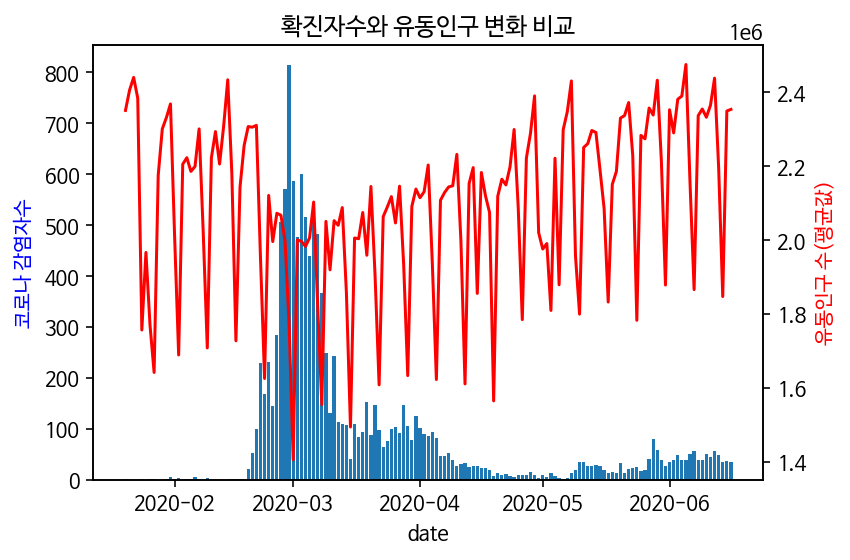

In [ ]:
"""fig=make_subplots(rows=2,cols=1,shared_xaxes=True, vertical_spacing=0.02,row_heights=[0.7,0.3],)

fig.add_trace(go.Line(x=fpopl_by_day['base_ymd'],y=fpopl_by_day["popltn_cascnt"],name="유동인구변화"),row=1,col=1)
fig.add_trace(go.Bar(x=confirmed['date'],y=confirmed['daily_confirmed'],name='확진자수',row=1,col=1))

fig.update_layout(height=326*2,width=280*3,title_text="확진자수와 유동인구 변화")

fig.show()"""

fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(confirmed['date'],confirmed['daily_confirmed'])
ax2.plot(fpopl_by_day['base_ymd'],fpopl_by_day['popltn_cascnt'],color='r')

ax1.set_xlabel('date')
ax1.set_ylabel('코로나 감염자수',color='b')
ax2.set_ylabel('유동인구 수(평균값)', color='r')

plt.title('확진자수와 유동인구 변화 비교')

plt.show()

눈으로 보기에 확실히 코로나 확진자수가 높을 때 유동인구 많음.

*유동인구 데이터가 어째서 저렇게 규칙적으로 생기는지 알수 없음.(주말유동인구 감소로 추측)


## 유동인구(평균)가 많은 상위 15개 지역 선정 (총 25개)**굵은 텍스트**

In [ ]:
fpopl_ads=fpopl[['base_ymd','ads_code','popltn_cascnt']]
fpopl_by_ads=fpopl_ads.groupby(['ads_code']).popltn_cascnt.mean().reset_index()
fpopl_by_ads=fpopl_by_ads.sort_values(by=['popltn_cascnt'],ascending=False)
fpopl_by_ads=fpopl_by_ads.reset_index()
fpopl_by_ads=fpopl_by_ads.drop(['index'],axis=1)
fpopl_by_ads.head()

,ads_code,popltn_cascnt
0,11680,318.838697
1,11650,308.961731
2,11440,245.019085
3,11560,234.642737
4,11200,211.550066


In [6]:
adstrd_nm=dict()
for i in range(len(adstrd_name)):
  adstrd_nm[adstrd_name['exp'][i]]=adstrd_name['total_adstrd'][i]
  

In [ ]:
fpopl_by_day_ads=fpopl_ads.groupby(['base_ymd','ads_code'],as_index=False).popltn_cascnt.mean()
fpopl_by_day_ads['base_ymd']=fpopl_by_day_ads['base_ymd'].astype(str)
for i in range(len(fpopl_by_day_ads)):
  fpopl_by_day_ads['base_ymd'][i]=datetime.datetime.strptime(fpopl_by_day_ads['base_ymd'][i],"%Y%m%d").date()
ad_name=[]
for i in range(len(fpopl_by_day_ads)):
  ad_name.append(adstrd_nm[fpopl_by_day_ads['ads_code'][i]])
fpopl_by_day_ads['ad_name']=ad_name
fpopl_by_day_ads.head()

,base_ymd,ads_code,popltn_cascnt,ad_name
0,2020-01-01,11110,114.859038,서울특별시 종로구
1,2020-01-01,11140,125.555756,서울특별시 중구
2,2020-01-01,11170,199.027101,서울특별시 용산구
3,2020-01-01,11200,166.700379,서울특별시 성동구
4,2020-01-01,11215,182.948687,서울특별시 광진구


In [ ]:
fig=px.line(fpopl_by_day_ads,x='base_ymd',y='popltn_cascnt',color='ad_name')
fig.update_layout(
    title={
        'text': "지역별 유동인구 변화",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(0)

## 연령대별 유동인구 변화

In [ ]:
fpopl_age=fpopl[['base_ymd','agrde_se_code','popltn_cascnt']]
fpopl_by_age=fpopl_age.groupby(['agrde_se_code']).popltn_cascnt.mean().reset_index()
"""fpopl_by_ads=fpopl_by_ads.sort_values(by=['popltn_cascnt'],ascending=False)
fpopl_by_ads=fpopl_by_ads.reset_index()
fpopl_by_ads=fpopl_by_ads.drop(['index'],axis=1)"""
fpopl_by_age.head()

,agrde_se_code,popltn_cascnt
0,age_00,8.533709
1,age_10,27.675834
2,age_15,73.005462
3,age_20,204.422033
4,age_25,323.163509


10,15,20,25 이런식으로 되어있는 연령대를 10, 20, 30 이런식으로 변경함.

In [ ]:
fpopl_age['agrde_se_code']=fpopl_age['agrde_se_code'].astype(str)
fpopl_age['agrde_se_code']=fpopl_age['agrde_se_code'].apply(lambda x:x[4:5])
fpopl_age.head()

,base_ymd,agrde_se_code,popltn_cascnt
0,20200101,0,15
1,20200101,0,6
2,20200101,0,4
3,20200101,0,12
4,20200101,0,6


In [ ]:
fpopl_by_day_age=fpopl_age.groupby(['base_ymd','agrde_se_code'],as_index=False).popltn_cascnt.mean()
fpopl_by_day_age['base_ymd']=fpopl_by_day_age['base_ymd'].astype(str)
for i in range(len(fpopl_by_day_age)):
  fpopl_by_day_age['base_ymd'][i]=datetime.datetime.strptime(fpopl_by_day_age['base_ymd'][i],"%Y%m%d").date()

fpopl_by_day_age.head()

,base_ymd,agrde_se_code,popltn_cascnt
0,2020-01-01,0,8.963105
1,2020-01-01,1,61.027637
2,2020-01-01,2,251.188679
3,2020-01-01,3,230.980469
4,2020-01-01,4,198.937426


In [ ]:
fig=px.line(fpopl_by_day_age,x='base_ymd',y='popltn_cascnt',color='agrde_se_code')
fig.update_layout(
    title={
        'text': "연령대별 유동인구 변화",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

주로 움직이는 연령대를 => 20대부터 50대로 볼수 있음 (아마 출퇴근 인원이 아닐까 싶음)

재택근무로 큰감소를 예측했으나 살짝 줄어든 정도

## 여성,남성 유동인구 차이

In [4]:
fpopl_sex=fpopl[['base_ymd','sexdstn_se_code','popltn_cascnt']]
fpopl_by_sex=fpopl_sex.groupby(['base_ymd','sexdstn_se_code'],as_index=False).popltn_cascnt.mean()
fpopl_by_sex['base_ymd']=fpopl_by_sex['base_ymd'].astype(str)
for i in range(len(fpopl_by_sex)):
  fpopl_by_sex['base_ymd'][i]=datetime.datetime.strptime(fpopl_by_sex['base_ymd'][i],"%Y%m%d").date()
fpopl_by_sex.head()

,base_ymd,sexdstn_se_code,popltn_cascnt
0,2020-01-01,F,147.905460
1,2020-01-01,M,171.651377
2,2020-01-02,F,174.530554
3,2020-01-02,M,220.338703
4,2020-01-03,F,184.962669


In [5]:
fig=px.line(fpopl_by_sex,x='base_ymd',y='popltn_cascnt',color='sexdstn_se_code')
fig.update_layout(
    title={
        'text': "성별 유동인구 변화",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

데이터 보면서 느낀점

-> 주말 데이터만 봐야 될까(평일 주말 차이가 심해 보임)

-> 코로나 이전에 비해 주말이 유동인구가 낮은지 볼수 있음

-> fpopl 파일도 서울지역만포함하고 있음.

## 시간대별 유동인구 변화

In [8]:
fpopl_time=fpopl[['tmzon_se_code','ads_code','popltn_cascnt']]
fpopl_by_time=fpopl_time.groupby(by=['tmzon_se_code','ads_code'],as_index=False).popltn_cascnt.mean()
fpopl_by_time.head()

,tmzon_se_code,ads_code,popltn_cascnt
0,0,11110,70.665366
1,0,11140,86.709965
2,0,11170,111.750565
3,0,11200,128.304927
4,0,11215,133.101312


In [9]:
adstrd_nm=dict()
for i in range(len(adstrd_name)):
  adstrd_nm[adstrd_name['exp'][i]]=adstrd_name['total_adstrd'][i]
  
ad_name=[]
for i in range(len(fpopl_by_time)):
  ad_name.append(adstrd_nm[fpopl_by_time['ads_code'][i]])
fpopl_by_time['ad_name']=ad_name
fpopl_by_time.head()

,tmzon_se_code,ads_code,popltn_cascnt,ad_name
0,0,11110,70.665366,서울특별시 종로구
1,0,11140,86.709965,서울특별시 중구
2,0,11170,111.750565,서울특별시 용산구
3,0,11200,128.304927,서울특별시 성동구
4,0,11215,133.101312,서울특별시 광진구


In [10]:
fig=px.line(fpopl_by_time,x='tmzon_se_code',y='popltn_cascnt',color='ad_name')
fig.update_layout(
    title={
        'text': "시간대별 지역의 유동인구 변화",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

## 요일별

In [23]:
fpopl_day=fpopl[['base_ymd','popltn_cascnt']]
fpopl_day=fpopl_day.groupby(by=['base_ymd'],as_index=False).popltn_cascnt.mean()
fpopl_day['base_ymd']=fpopl_day['base_ymd'].astype(str)
for i in range(len(fpopl_day)):
  fpopl_day['base_ymd'][i]=datetime.datetime.strptime(fpopl_day['base_ymd'][i],"%Y%m%d").date()
fpopl_day.head()

,base_ymd,popltn_cascnt
0,2020-01-01,159.768264
1,2020-01-02,197.419462
2,2020-01-03,209.325962
3,2020-01-04,192.751830
4,2020-01-05,166.078805


In [24]:
day_list=['월','화','수','목','금','토','일']
day_l=[]
for i in range(len(fpopl_day)):
  day_l.append(day_list[datetime.datetime.weekday(fpopl_day['base_ymd'][i])])

fpopl_day['day']=day_l
fpopl_day_1=fpopl_day.groupby(by=['day'],as_index=False).popltn_cascnt.mean()

In [25]:
fig=px.line(fpopl_day,x='base_ymd',y='popltn_cascnt',color='day')
fig.update_layout(
    title={
        'text': "요일별 지역의 유동인구 변화",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()